In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io import wavfile
from IPython.display import Audio
import os
%matplotlib inline

In [3]:
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(9,7)

In [6]:
BASE_DIR=r"C:/Users/Rahul/Desktop/NLP/audio/"
car_file="car.wav"

In [7]:
audio_file=os.path.join(BASE_DIR,car_file)
sampFreq, sound = wavfile.read(audio_file)

In [8]:
Audio(sound,rate=sampFreq)

In [9]:
sound.dtype, sampFreq

(dtype('int16'), 8000)

In [10]:
sound.shape

(128000,)

---------------------------------------------------------------

In [12]:
from skimage import util

M= 1024

slices= util.view_as_windows(sound,window_shape=(M,),step=100)
print(f"Sliced Audio Shape: {slices.shape}")

Sliced Audio Shape: (1270, 1024)


In [13]:
win=np.hanning(M+1)[:-1]
slices=slices *win

In [14]:
slices=slices.T
print(slices.shape)

(1024, 1270)


----------------------------------------

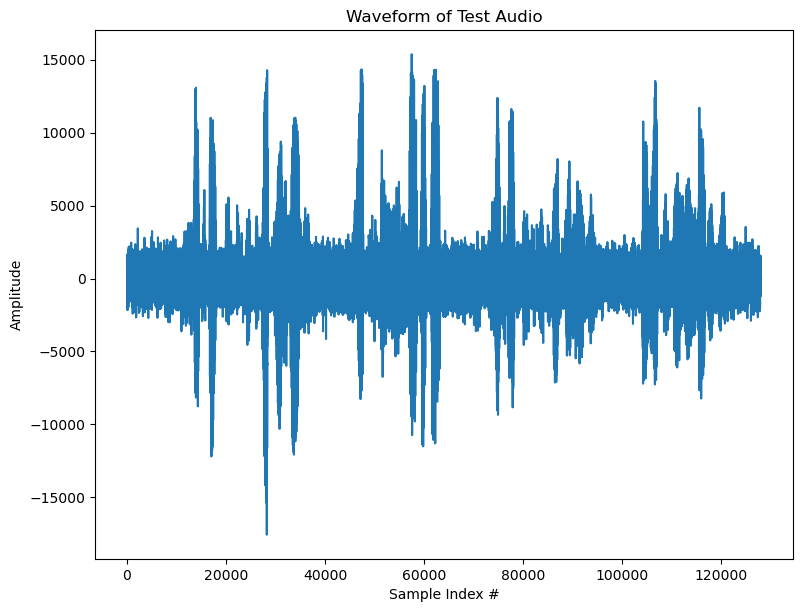

(array([[3.43234327e+05, 2.19405669e+05, 8.93177397e+04, ...,
         1.75887193e+05, 8.44623114e+04, 2.53583416e+05],
        [1.26663969e+06, 1.38976366e+06, 3.66833062e+05, ...,
         5.07348087e+04, 7.54641682e+04, 1.61979891e+05],
        [6.12675229e+05, 3.14435305e+06, 9.13914025e+05, ...,
         3.41921873e+05, 3.62459977e+06, 8.26121732e+05],
        ...,
        [4.09441324e+02, 4.19161358e+02, 1.75087929e+02, ...,
         6.43382736e+01, 1.00470147e+03, 9.43353243e+01],
        [2.36254464e+02, 3.30031086e+02, 3.57277536e+01, ...,
         3.21103889e+02, 5.83114151e+02, 1.49374246e+02],
        [8.68405396e+00, 1.28029906e+02, 4.46844568e-01, ...,
         2.97194446e+02, 3.19424988e+02, 2.12778673e+02]]),
 array([0.0000e+00, 2.5000e-04, 5.0000e-04, ..., 9.9950e-01, 9.9975e-01,
        1.0000e+00]),
 array([ 2000.,  5936.,  9872., 13808., 17744., 21680., 25616., 29552.,
        33488., 37424., 41360., 45296., 49232., 53168., 57104., 61040.]),
 <matplotlib.image.AxesI

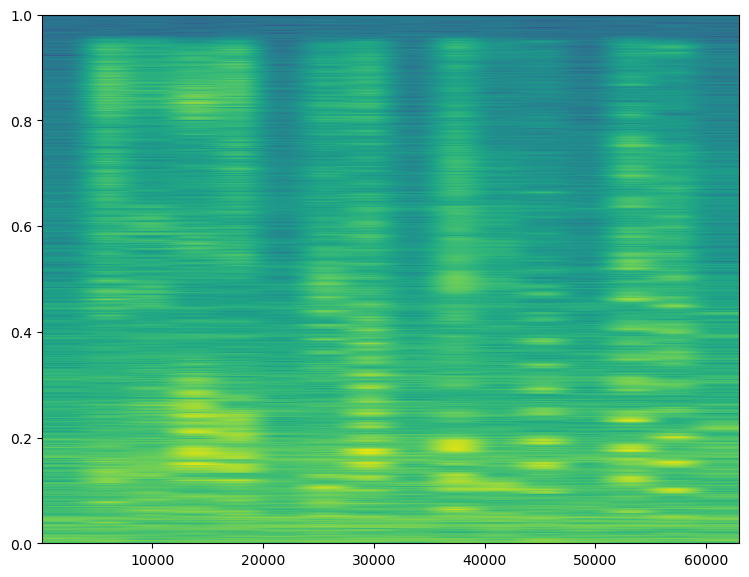

In [17]:
plt.figure()
plt.plot(sound)
plt.xlabel("Sample Index #")
plt.ylabel("Amplitude")
plt.title("Waveform of Test Audio")
plt.show()
plt.specgram(sound,sampFreq)

In [53]:
car_ft=np.fft.fft(sound)

In [54]:
car_ft.shape

(128000,)

In [47]:
car_ft[0]

(33.11822509765625+0j)

In [48]:
magnitude_spectrum_car=np.abs(car_ft)

In [49]:
magnitude_spectrum_car[0]

33.11822509765625

In [60]:
def plot_magnitude_spectrum(signal,title,sr,f_ratio=1):         #sr-->sample_rate
    ft= np.fft.fft(signal)
    magnitude_spectrum= np.abs(ft)

    plt.figure(figsize=(10,5))

    frequency = np.linspace(0,sr,len(magnitude_spectrum))
    num_frequency_bins=int(len(frequency)*f_ratio)

    plt.plot(frequency[:num_frequency_bins],magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.title(title)

    plt.show()

In [61]:
# def fft_plot(audio, sampling_rate):
#     n=len(audio)
#     T=1/sampling_rate
#     yf=scipy.ifft(audio)
#     xf=np.linspace(0.0,1.0/(2.0*T),int(n/2))
#     fig,ax =plt.subplots()
#     ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
#     plt.grid()
#     plt.xlabel("Frequency --->")
#     plt.ylabel("Magnitude")
#     return plt.show()

# fft_plot(sound,sampFreq)    

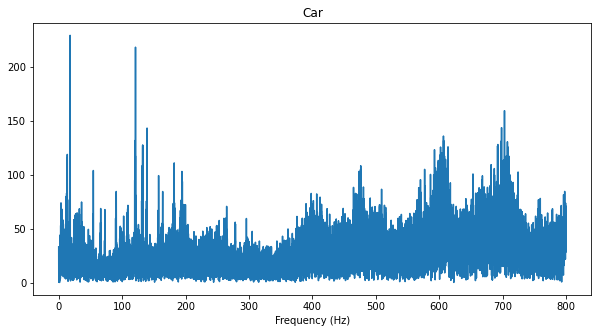

In [63]:
plot_magnitude_spectrum(sound,"Car",sampFreq,0.1)